In [16]:
import pandas as pd
import os
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

                                Product Name        Date         Price
0                   iPhone 16 Pro Max 256 GB  12.09.2024  99.999,00 TL
1                   iPhone 16 Pro Max 256 GB  12.09.2024  99.999,00 TL
2                   iPhone 16 Pro Max 256 GB  12.09.2024  99.999,00 TL
3                   iPhone 16 Pro Max 256 GB  12.09.2024  99.999,00 TL
4                   iPhone 16 Pro Max 256 GB  12.09.2024  99.999,00 TL
...                                      ...         ...           ...
17952  Samsung Galaxy S22 Ultra 256 GB 12 GB  12.05.2025  46.879,71 TL
17953  Samsung Galaxy S22 Ultra 256 GB 12 GB  12.05.2025  46.879,71 TL
17954  Samsung Galaxy S22 Ultra 256 GB 12 GB  12.05.2025  46.879,71 TL
17955  Samsung Galaxy S22 Ultra 256 GB 12 GB  12.05.2025  46.879,71 TL
17956  Samsung Galaxy S22 Ultra 256 GB 12 GB  12.05.2025  46.879,71 TL

[17957 rows x 3 columns]
                 Product Name        Date   Price
0    iPhone 16 Pro Max 256 GB  12.09.2024   99999
7    iPhone 16 Pro Max

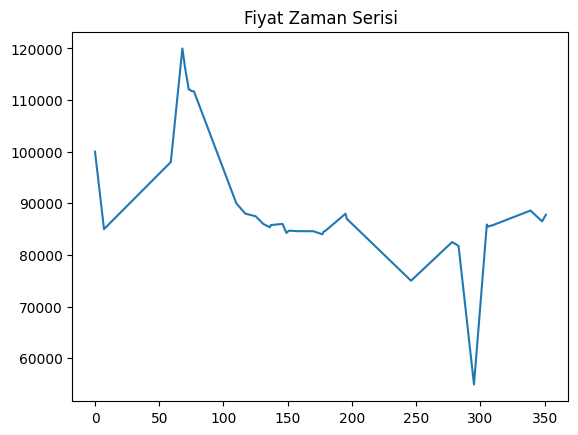

In [23]:
df = pd.read_csv(r"csv/akakce.csv")
print(df)
df = df[df["Product Name"] == "iPhone 16 Pro Max 256 GB"]
df["Price"] = df["Price"].apply(lambda x: int(str(x).replace(" TL", "").split(",")[0].replace(".", "")))
df["Price"] = df["Price"].astype(int)
df = df.drop_duplicates(subset=["Date"])
df = df.drop_duplicates(subset=["Price"])
# df = df.reset_index(drop=True)   
df['Price'].plot(title='Fiyat Zaman Serisi')
print(df)

In [ ]:
model = ARIMA(df['Price'], order=(3, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  265
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -2172.843
Date:                Mon, 12 May 2025   AIC                           4355.686
Time:                        21:42:25   BIC                           4373.566
Sample:                             0   HQIC                          4362.871
                                - 265                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3103      0.730     -0.425      0.671      -1.742       1.121
ar.L2         -0.0880      0.092     -0.959      0.338      -0.268       0.092
ar.L3         -0.0591      0.046     -1.289      0.1

265    50541.629706
266    50300.935961
267    50326.548315
268    50346.064442
269    50351.977961
Name: predicted_mean, dtype: float64


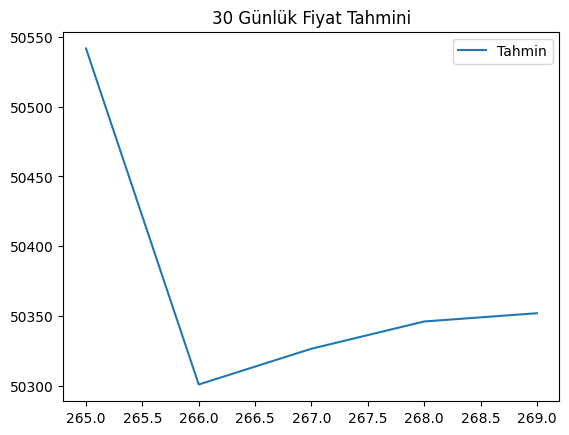

In [ ]:
import matplotlib.pyplot as plt

forecast = model_fit.forecast(steps=5)
forecast.plot(label='Tahmin')
print(forecast)
plt.legend()
plt.title("30 Günlük Fiyat Tahmini")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Price'])  # Zaman serisi burada 'fiyat'
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.343770964146995
p-value: 0.15823916680527544


In [ ]:
df['price_diff'] = df['Price'].diff().dropna()
df.dropna(subset=['price_diff'], inplace=True)
print(len(df))
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['price_diff'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")



264
ADF Statistic: -6.546099991568673
p-value: 9.091381776620345e-09


264    50476.315733
265    50393.800173
266    50354.141223
267    50335.080184
268    50325.918994
269    50321.515907
270    50319.399678
271    50318.382568
272    50317.893720
273    50317.658768
Name: predicted_mean, dtype: float64


C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: Va

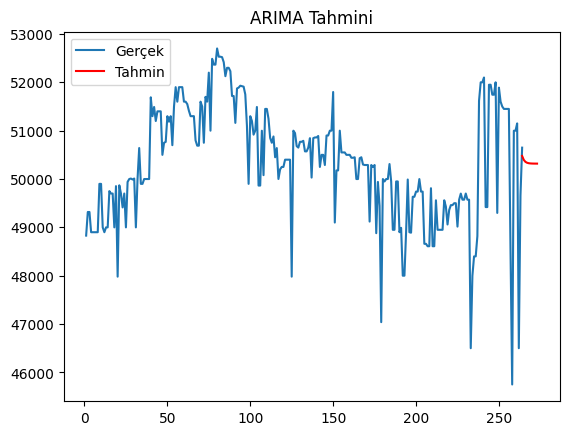

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

model = ARIMA(df['Price'], order=(1, 1, 1)) 
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)
print(forecast)
plt.plot(df['Price'], label='Gerçek')
plt.plot(range(len(df), len(df)+10), forecast, label='Tahmin', color='red')
plt.title('ARIMA Tahmini')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

data = pd.DataFrame({
    'RAM': [8, 6, 4, 8, 16],
    'Depolama': [128, 128, 64, 256,512],
    'Ekran': [6.5, 6.3, 5.8, 6.7,6.7],
    'Kamera': [64, 48, 12, 108,200],
    'Fiyat': [17000, 19000, 20000, 25000,40000]
}

)

X = data[['RAM', 'Depolama', 'Ekran', 'Kamera']]
y = data['Fiyat']

model = KNeighborsRegressor(n_neighbors=2)
model.fit(X, y)

yeni_telefon = pd.DataFrame({
    'RAM': [6],
    'Depolama': [64],
    'Ekran': [5.2],
    'Kamera': [5]
})

tahmin = model.predict(yeni_telefon)
print(f"Estimation price: {tahmin[0]:.2f} TL")


Tahmini fiyat: 19500.00 TL


Estimation price: 7125.00 TL


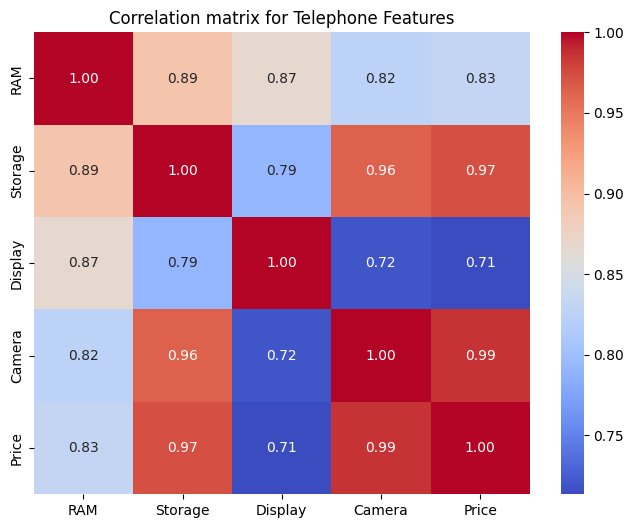

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

data = pd.DataFrame({
    'RAM':       [2, 4, 6, 8, 12, 4, 6, 8, 12, 16, 3, 6, 8, 8, 4, 6, 10, 12, 6, 8],
    'Storage':  [32, 64, 128, 128, 256, 64, 128, 128, 256, 512, 64, 128, 128, 256, 64, 128, 256, 512, 128, 256],
    'Display':     [5.0, 5.5, 6.1, 6.3, 6.7, 5.8, 6.0, 6.4, 6.5, 6.8, 5.2, 6.2, 6.3, 6.6, 5.5, 6.1, 6.6, 6.9, 6.3, 6.7],
    'Camera':    [8, 12, 16, 48, 64, 13, 20, 32, 64, 200, 5, 24, 48, 108, 12, 16, 64, 200, 50, 64],
    'Price':     [3000, 4500, 7000, 10000, 14000, 5000, 7500, 9000, 13000, 40000, 2500, 6800, 9800, 17000, 4900, 7200, 12000, 39000, 8500, 16000]
})

X = data[['RAM', 'Storage', 'Display', 'Camera']]
y = data['Price']

model = KNeighborsRegressor(n_neighbors=4)
model.fit(X, y)

yeni_telefon = pd.DataFrame({
    'RAM': [1],
    'Storage': [190],
    'Display': [5.2],
    'Camera': [2]
})

tahmin = model.predict(yeni_telefon)
print(f"Estimation price: {tahmin[0]:.2f} TL")
corr = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix for Telephone Features")
plt.show()


Estimation price: 1169.11 USD


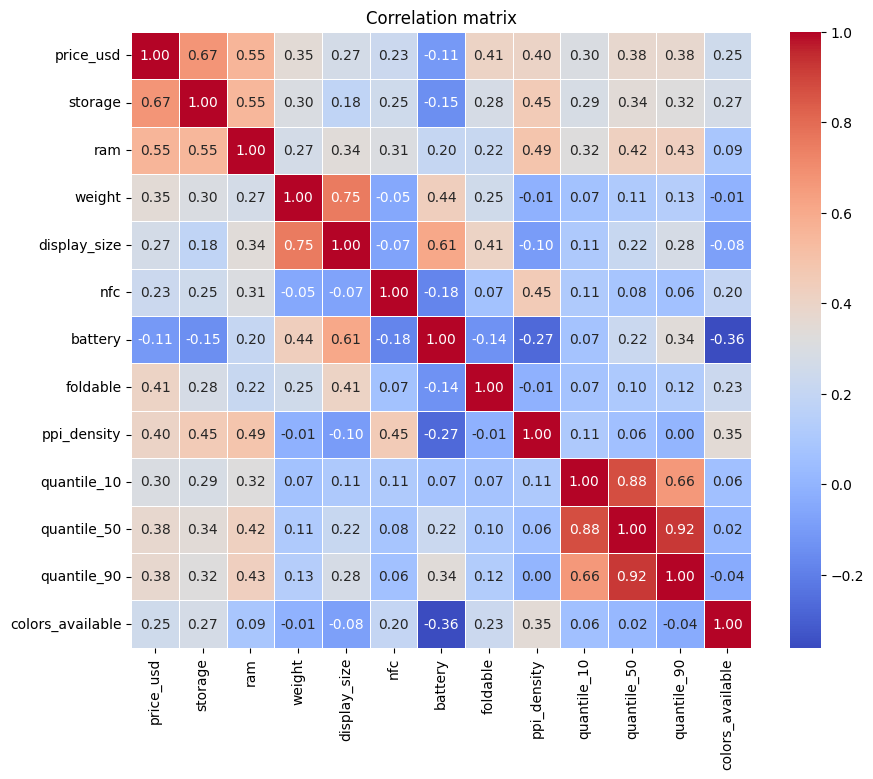

In [11]:
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"csv/phones.csv")

X = df[["ram", "storage", "display_size", "weight"]]
y = df["price_usd"]

model = KNeighborsRegressor(n_neighbors=4)
model.fit(X, y)

yeni_telefon = pd.DataFrame(
    [{"ram": 700, "storage": 1024, "display_size": 6.2, "weight": 199.0}]
)

tahmin = model.predict(yeni_telefon)
print(f"Estimation price: {tahmin[0]:.2f} USD")


numeric_df = df.select_dtypes(include=[float, int])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation matrix")
plt.show()